In [1]:
# Libraries
import pandas as pd # load and inspect data
import numpy as np # math operations
import matplotlib.pyplot as plt # visualize patterns
import seaborn as sns # visualize patterns

In [2]:
# Loading Data
df = pd.read_csv('/kaggle/input/student-performance/StudentPerformance.csv') # read the dataset into a dataframe so we can explore it

In [3]:
# target EDA start

In [4]:
# First look at the data

df.head() # shows the first few rows 

#  tells us what each row represents (one student)
# what each column means
# if values look reasonable

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [5]:
# check column names
df.columns

# available features
# which column can be the target
# which columns are numerical or categorical 

Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index'],
      dtype='object')

In [6]:
df.columns = (
    df.columns
    .str.strip()
    .str.lower()
    .str.replace(" ", "_")
)

print(df.columns)

Index(['hours_studied', 'previous_scores', 'extracurricular_activities',
       'sleep_hours', 'sample_question_papers_practiced', 'performance_index'],
      dtype='object')


In [7]:
# Understand feature types
df.info()

# Numerical - numbers we can measure (hours, scores)
# Categorical - labels (yes / no)
# Target - value we want to predict

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   hours_studied                     10000 non-null  int64  
 1   previous_scores                   10000 non-null  int64  
 2   extracurricular_activities        10000 non-null  object 
 3   sleep_hours                       10000 non-null  int64  
 4   sample_question_papers_practiced  10000 non-null  int64  
 5   performance_index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [8]:
target = "performance_index"

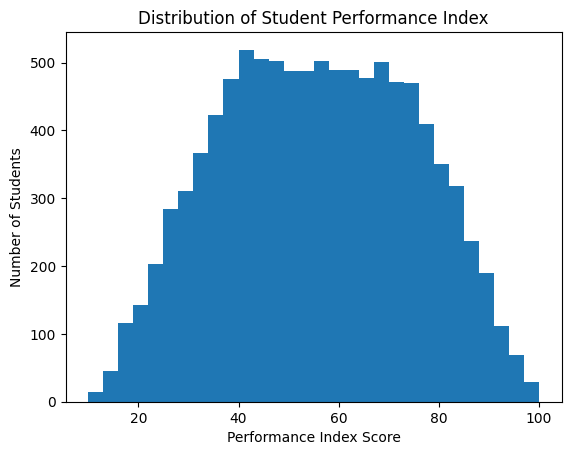

In [9]:
# Target Distribution check
plt.hist(df[target], bins = 30) # is well spread, is not constant, has no extreme issues
plt.xlabel("Performance Index Score")
plt.ylabel("Number of Students")
plt.title("Distribution of Student Performance Index")
plt.show() # the target is viable for modeling
# Looks symmetric (Bell curved)

In [10]:
# why 30 bins
# 30 bins balance detail and smoothness
# too few bins hide patterns 
# too many bins create noise
# this helps visualize the true distribution

In [11]:
# target EDA finished

In [12]:
# target analysis

# We analyze how each feature relates to the target
# This helps identify which variables influence the outcome
# Strong relationships = good predictors for the model

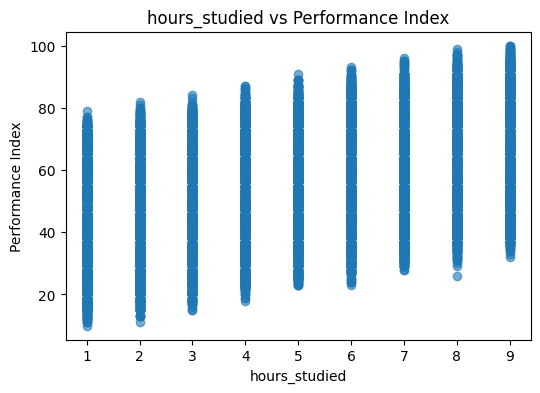

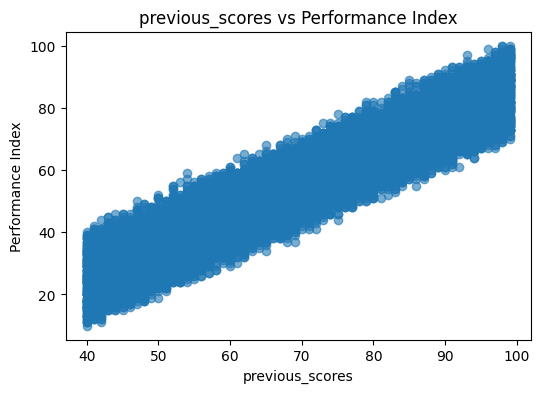

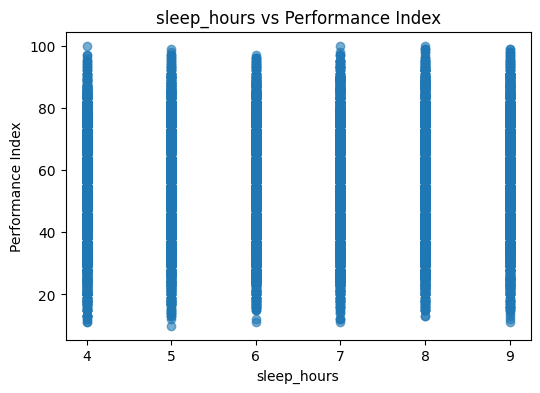

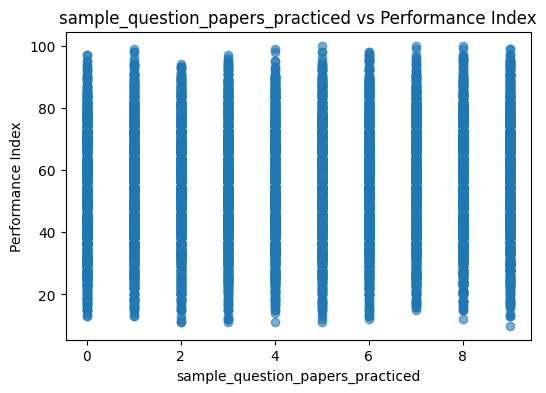

In [13]:
# Numerical Features vs Target

num_features = [
    "hours_studied",
    "previous_scores",
    "sleep_hours",
    "sample_question_papers_practiced"
]

for col in num_features:
    # Scatter plot shows trends between a numerical feature and the target
    # Upward trend - positive relationship
    # Downward trend - negative relationship
    # No clear pattern - weak relationship
    plt.figure(figsize = (6, 4))
    plt.scatter(df[col], df["performance_index"], alpha = 0.6)
    plt.xlabel(col)
    plt.ylabel("Performance Index")
    plt.title(f"{col} vs Performance Index")
    plt.show()

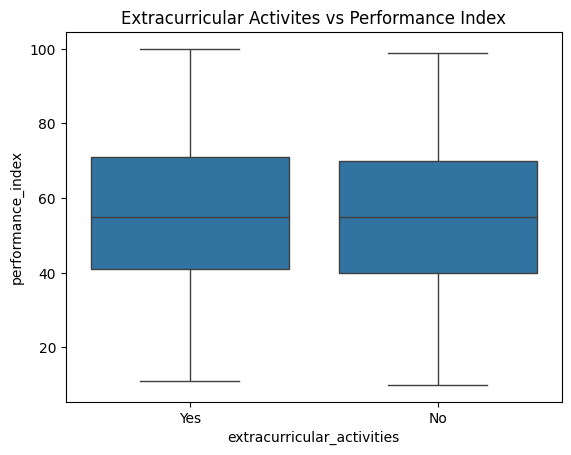

In [14]:
# Categorical Features vs Target

# Boxplots compare target distributions across categories
# Differences in medians indicate feature usefulness

sns.boxplot(
    x = "extracurricular_activities",
    y = "performance_index",
    data = df
)

plt.title("Extracurricular Activites vs Performance Index")
plt.show()

In [15]:
df["performance_index"].median()

55.0

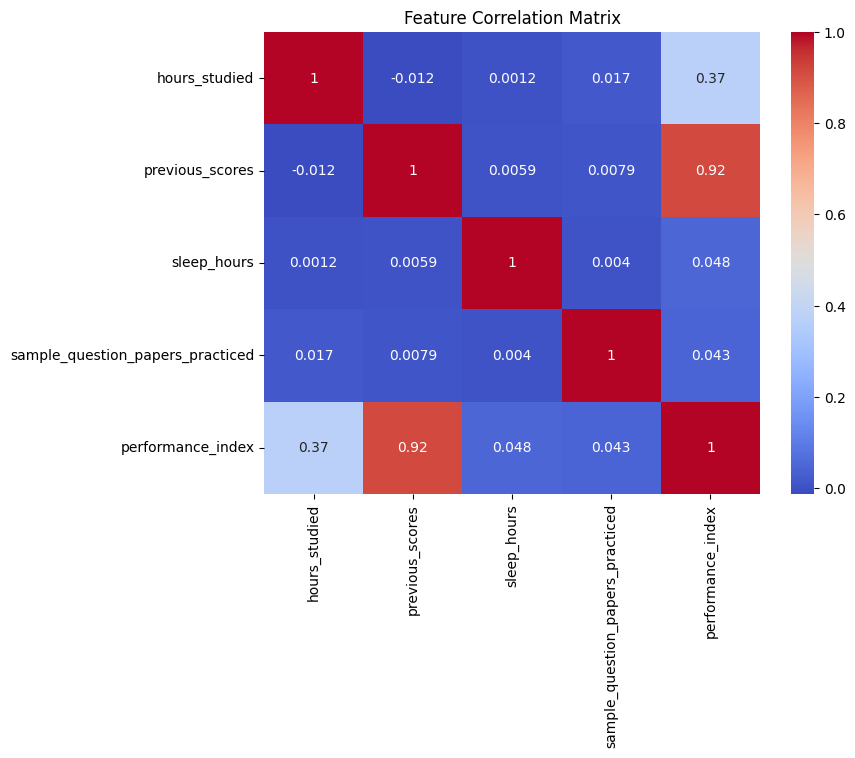

In [16]:
# Correlation measures linear relationships between variables
# Values closer to 1 or -1 indicate stronger relationships
# This helps rank features by importance

corr = df.corr(numeric_only=True)

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Feature Correlation Matrix")
plt.show()


In [17]:
# Check for missing values
# Missing data can bias models or cause errors

df.isnull().sum()


hours_studied                       0
previous_scores                     0
extracurricular_activities          0
sleep_hours                         0
sample_question_papers_practiced    0
performance_index                   0
dtype: int64

In [18]:
# Describe shows summary statistics
# Used to detect outliers and unrealistic values

df.describe()


,hours_studied,previous_scores,sleep_hours,sample_question_papers_practiced,performance_index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [19]:
# Domain sanity checks
# Example:
# - Sleep Hours should not exceed realistic bounds
# - Study hours should not be negative

In [20]:
# Convert categorical variables into numerical form
# This allows machine learning models to process them

df["extracurricular_activities"] = df["extracurricular_activities"].map({
    "Yes": 1,
    "No": 0
})


In [21]:
# Key findings from EDA:
# - Performance Index has a well-balanced distribution
# - Previous Scores and Hours Studied show strong positive relationships
# - Extracurricular Activities shows moderate group differences
# - No significant missing values detected
# - Dataset is suitable for regression modeling